In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

sns.set_palette("colorblind")
colorblind = sns.color_palette("colorblind")
deep = sns.color_palette("deep")

import matplotlib.font_manager as fm

# Add Avenir to the font list - try both common Avenir font names
plt.rcParams["font.family"] = ["Avenir", "Avenir Next"]     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white"

plt.rcParams["font.family"] = ""     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white" 

In [2]:
%matplotlib inline

In [3]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")

In [45]:
markers = [
    'o',        # circle
    r'$\clubsuit$',  # club symbol
    r'$\heartsuit$', # heart symbol
    r'$\star$',     # star
    r'$\oplus$',    # circled plus
    r'$\otimes$',   # circled times
    r'$\diamondsuit$', # diamond symbol
    r'$\circledcirc$', # double circle
    r'$\triangle$',    # triangle
    r'$\square$',      # square
    r'$\infty$',       # infinity symbol
    r'$\spadesuit$',    # spade symbol
    r'$\times$',       # times symbol
]
qwen_marker = markers[0]
llama_marker = markers[3]
qwen_color = "#ae8ff2"
llama_color = "#8fbff2"

In [40]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")
df_qwen_all = df_qwen[df_qwen["condition"] == "all_strategies"].sort_values("step")
df_llama_all = df_llama[df_llama["condition"] == "all_strategies"].sort_values("step")
df_llama_owmqa = df_llama[df_llama["condition"] == "owmathqa2_ppo"].sort_values("step")
df_llama_owmqa_none = df_llama[df_llama["condition"] == "owmathqa_none_ppo1"].sort_values("step")

In [6]:
# print the keys of df_qwen_base
print(df_qwen_base.keys())

Index(['condition', 'step', 'avg_verifications', 'avg_backtracking',
       'avg_subgoals', 'avg_backwards', 'total_verifications',
       'total_backtracking', 'total_subgoals', 'total_backwards', 'accuracy',
       'response_length'],
      dtype='object')


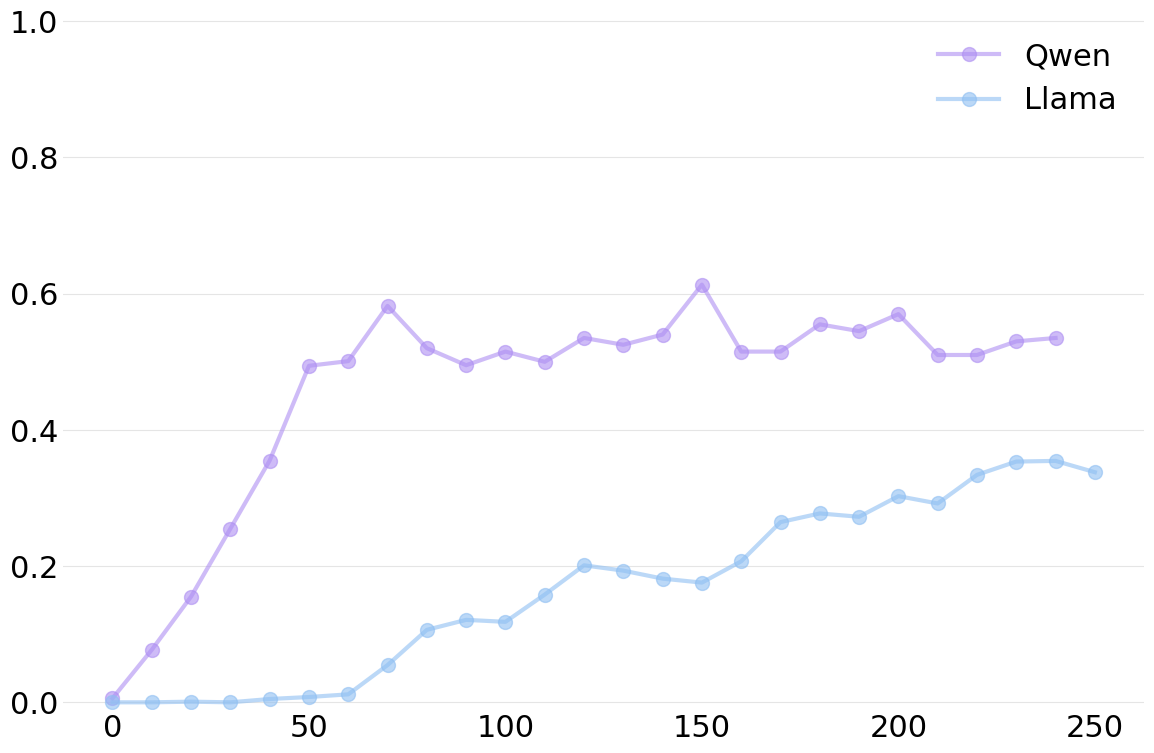

In [10]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend
ax.legend(["Qwen", "Llama"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("accuracy_qwen_llama_base.png", dpi=300)
plt.show()

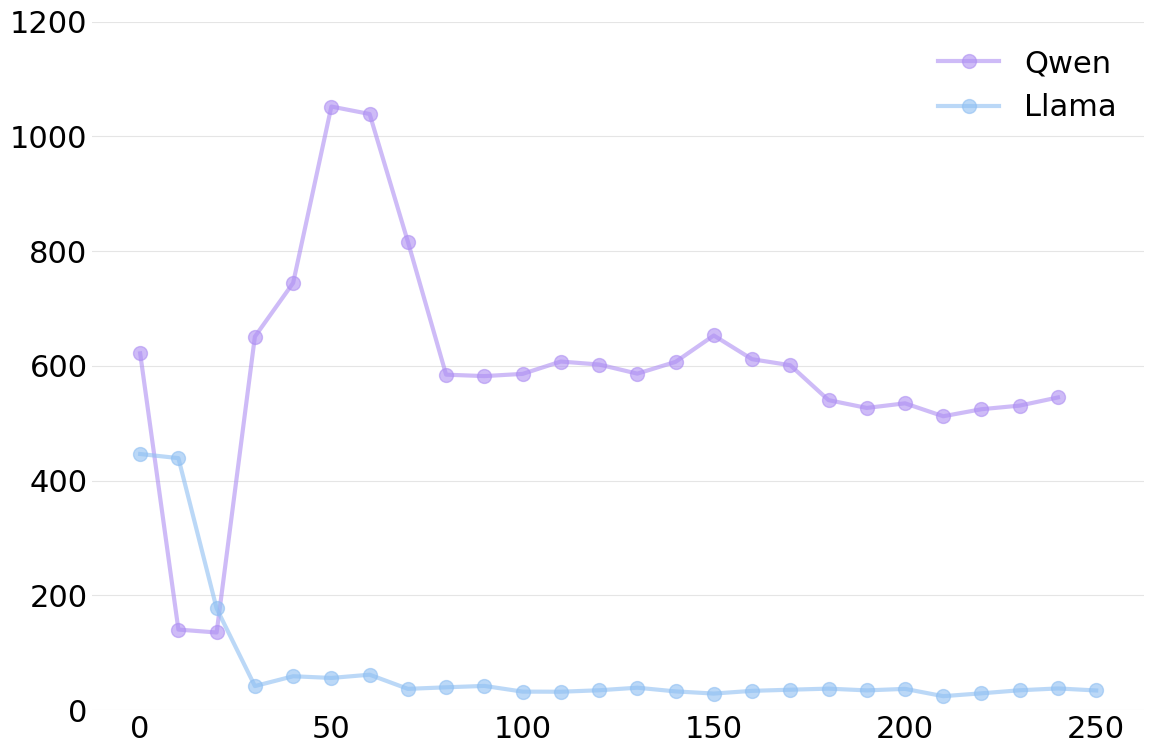

In [16]:
# plot response length for qwen and llama
phenomena = ['response_length']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1200)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["response_length"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["response_length"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend

ax.legend(["Qwen", "Llama"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("response_length_qwen_llama_base.png", dpi=300)
plt.show()

In [23]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {'avg_verifications': 'Verifications', 'avg_backtracking': 'Backtracking', 'avg_subgoals': 'Subgoal Setting', 'avg_backwards': 'Backwards Chaining'}


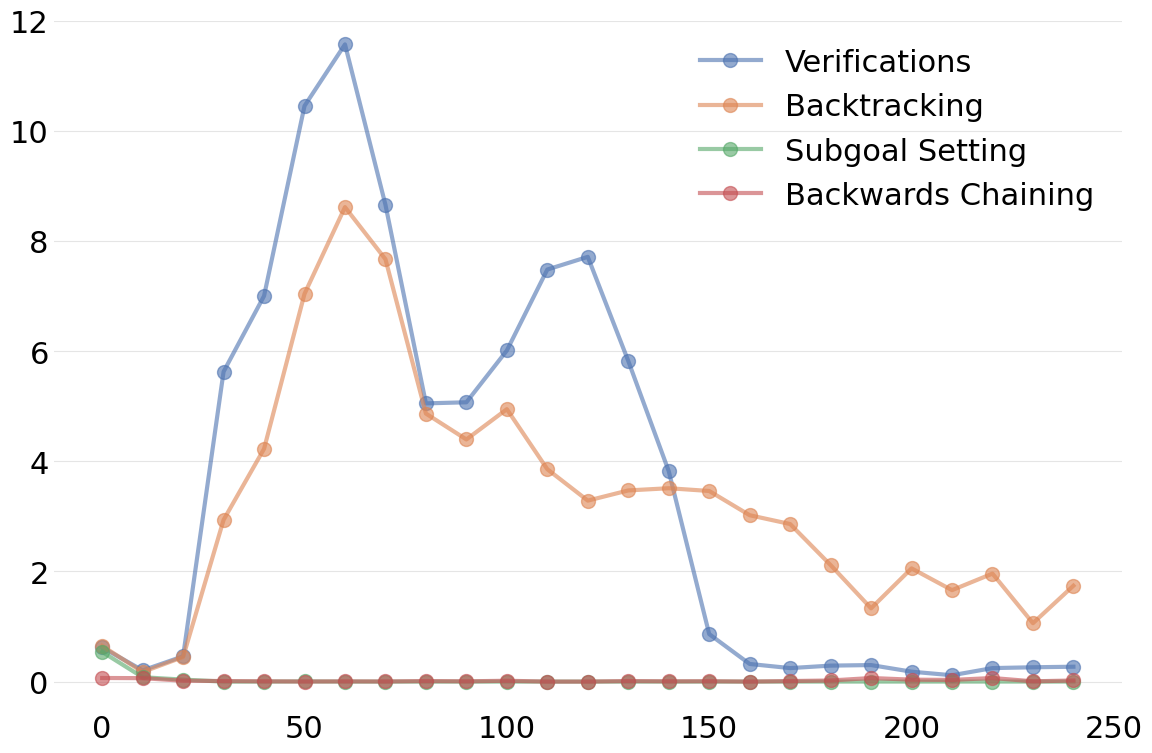

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.5, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,  # Use different markers for each line
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
            alpha=0.6,
            linewidth=3
        )
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("avg_strategies_qwen_base.png", dpi=300)

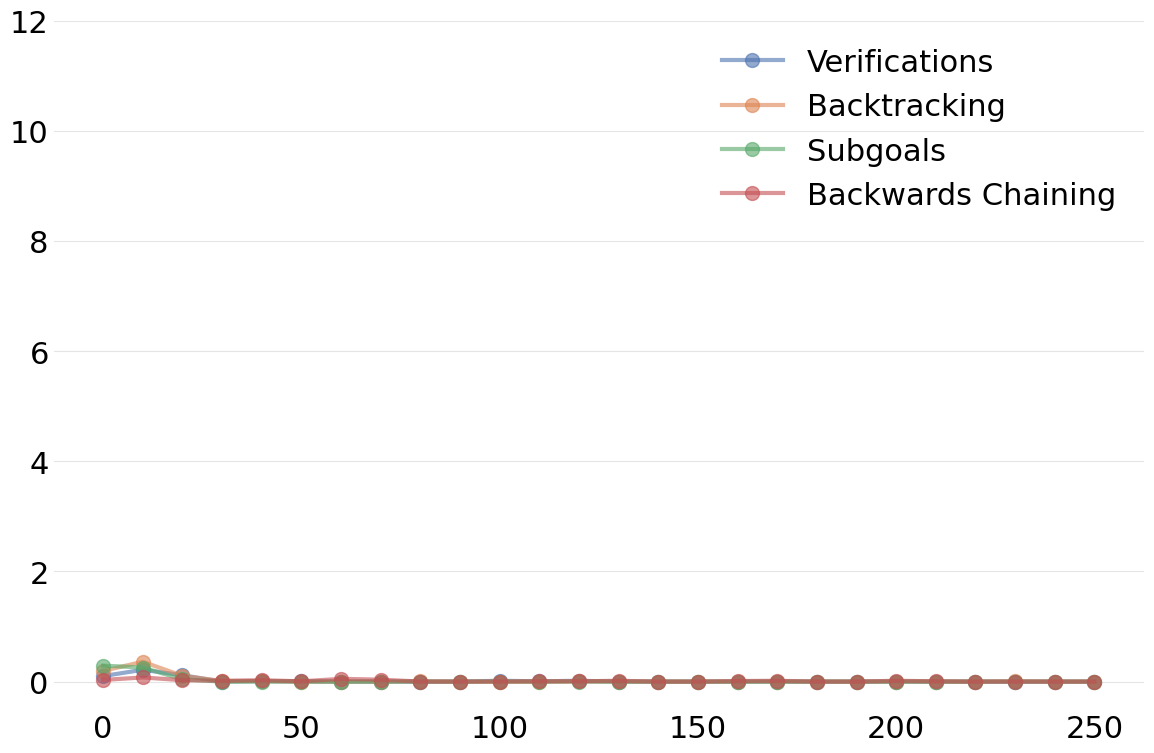

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.5, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=qwen_marker,  # Use different markers for each line
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
            alpha=0.6,
            linewidth=3
        )
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("avg_strategies_llama_base.png", dpi=300)

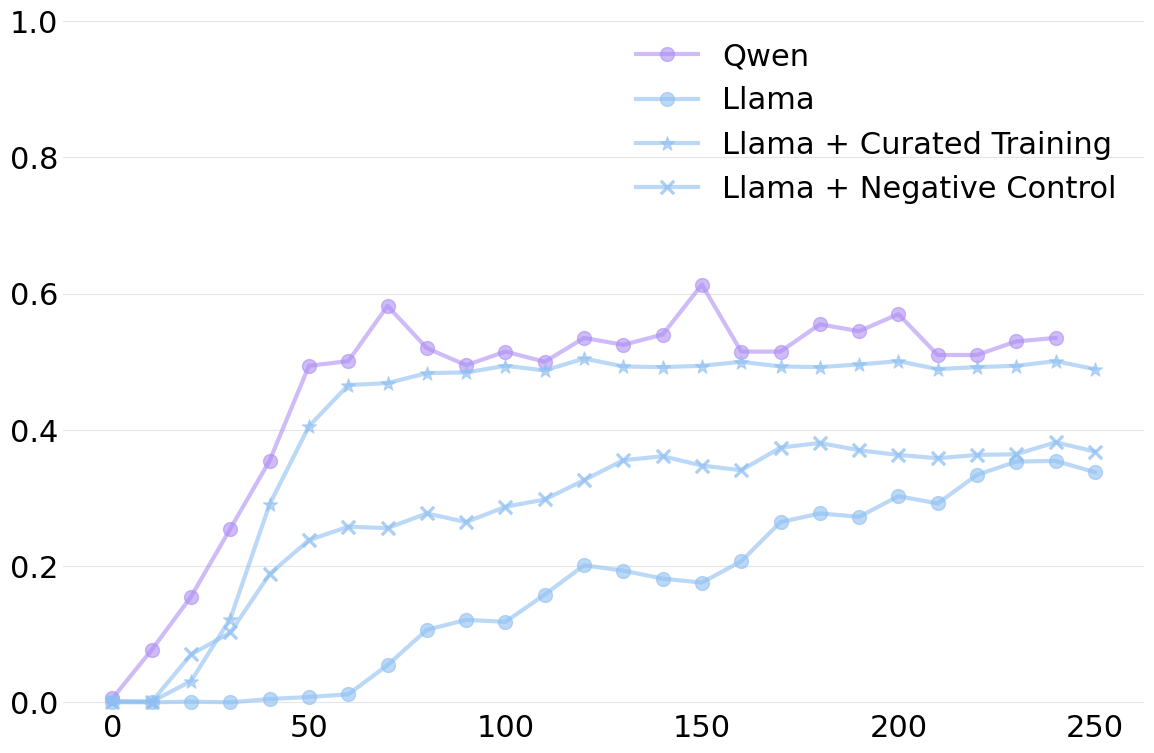

In [51]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_owmqa["step"], df_llama_owmqa["accuracy"], marker=llama_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_owmqa_none["step"], df_llama_owmqa_none["accuracy"], marker=markers[-1], markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend on the right next to the plot, in a horizontal line
ax.legend(["Qwen", "Llama", "Llama + Curated Training", "Llama + Negative Control"], loc='upper right',frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("accuracy_qwen_llama_owmqa.png", dpi=300)
plt.show()

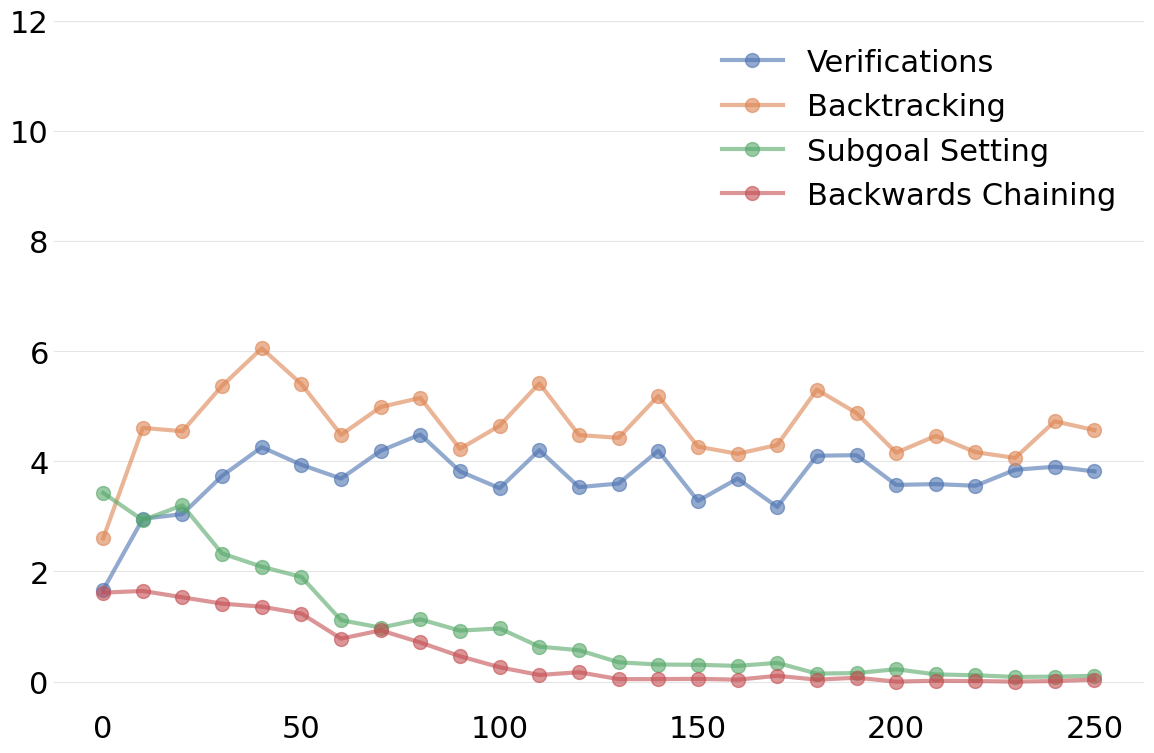

In [39]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {'avg_verifications': 'Verifications', 'avg_backtracking': 'Backtracking', 'avg_subgoals': 'Subgoal Setting', 'avg_backwards': 'Backwards Chaining'}

fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.5, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_llama_all["step"],
            df_llama_all[phenomenon],
            marker=qwen_marker,  # Use different markers for each line
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
            alpha=0.6,
            linewidth=3
        )
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("avg_strategies_llama_all.png", dpi=300)

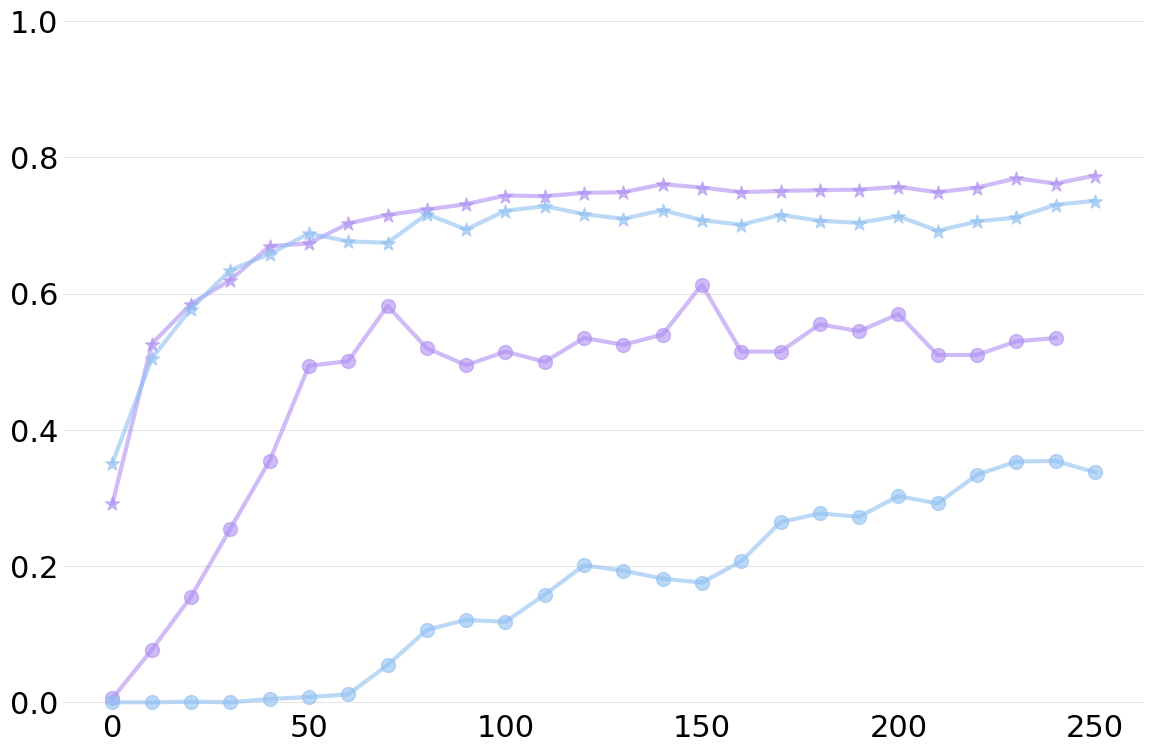

In [50]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_qwen_all["step"], df_qwen_all["accuracy"], marker=llama_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_all["step"], df_llama_all["accuracy"], marker=llama_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend on the right next to the plot, in a horizontal line
# ax.legend(["Qwen", "Qwen w/ All Behaviors", "Llama", "Llama w/ All Behaviors"], loc='upper center', bbox_to_anchor=(0.5, -0.05), frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("accuracy_qwen_llama_all.png", dpi=300)
plt.show()